In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

#### WT analysis of ECMWF

In [2]:
def plot_wt_hist_day(dir_i, n_fcst):
    '''
    bar plot of ECMWF weather type distribution
    dir_i: input weather type directory
    n_fcst: forecast day. Read n_fcst lines from weather type file
    '''
    year_s = 1993
    year_e = 2021
    
    n_wt   = 12
    n_month = 12
    arr_2d = np.zeros((n_wt, n_month))
    
    for year in range(year_s, year_e+1, 1):
        
        if year < 2017:
            n_mem = 25
        else:
            n_mem = 51
    
        for month in range(1, n_month+1,1):
            for mem in range(1, n_mem+1, 1):
                mem_s = str(mem).zfill(2)
                flnm_i = dir_i + 'CONUS-WTs_' + str(year) + str(month).zfill(2)+ '_'+ mem_s+'.cla'
             
                wts = pd.read_csv(flnm_i, delimiter = '\t', header=None,  
                                  names=["year", "month", "day", "wt"], nrows=n_fcst)
            
                # Get Unique Values from a Column
                month_u = wts['month'].unique()
             
                for mu in month_u:
                    for wt in range(1, n_wt+1,1):
                        rows = wts[(wts['month']==mu) & (wts['wt']==wt)]
                        arr_2d[wt-1][mu-1]= arr_2d[wt-1][mu-1] + len(rows)

    # Plotting
    fig, axs = plt.subplots(3, 4, figsize=(20,10))

    for nr in range(3):
        for nc in range(4):
            nn = nr*4 + nc
            axs[nr][nc].set_xlabel("month")
            axs[nr][nc].set_title("WT" + str(nn+1))
            axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
    plt.tight_layout()          

In [3]:
year_s = 1993
year_e = 2021
n_month = 12

# ECMWF 215 day FCST
n_month_fcst = 7  
n_wt = 12
dir_i = '/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/WT_01/'

#### member 01 for normalization

In [4]:
dir_i = '/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/WT_01/'
arr_2d = np.zeros((n_wt, 12))

for year in range(year_s, year_e+1, 1):
    #print(year)
    if year < 2017:
        n_mem = 25
    else:
        n_mem = 51
    
    for month in range(1, n_month+1,1):
        for mem in range(1, n_mem+1, 1):
            mem_s = str(mem).zfill(2)
            flnm_i = dir_i + 'CONUS-WTs_' + str(year) + str(month).zfill(2)+ '_'+ mem_s+'.cla'
            #print(flnm_i)
            wts = pd.read_csv(flnm_i, delimiter = '\t', header=None,  
                              names=["year", "month", "day", "wt"])
            # Get Unique Values from a Column
            month_u=wts['month'].unique()
            for month_0 in month_u:
                # Get the First Row of a Pandas DataFrame               
                for wt in range(1, n_wt+1,1):
                    rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
                    arr_2d[wt-1][month_0-1]=arr_2d[wt-1][month_0-1] + len(rows)            

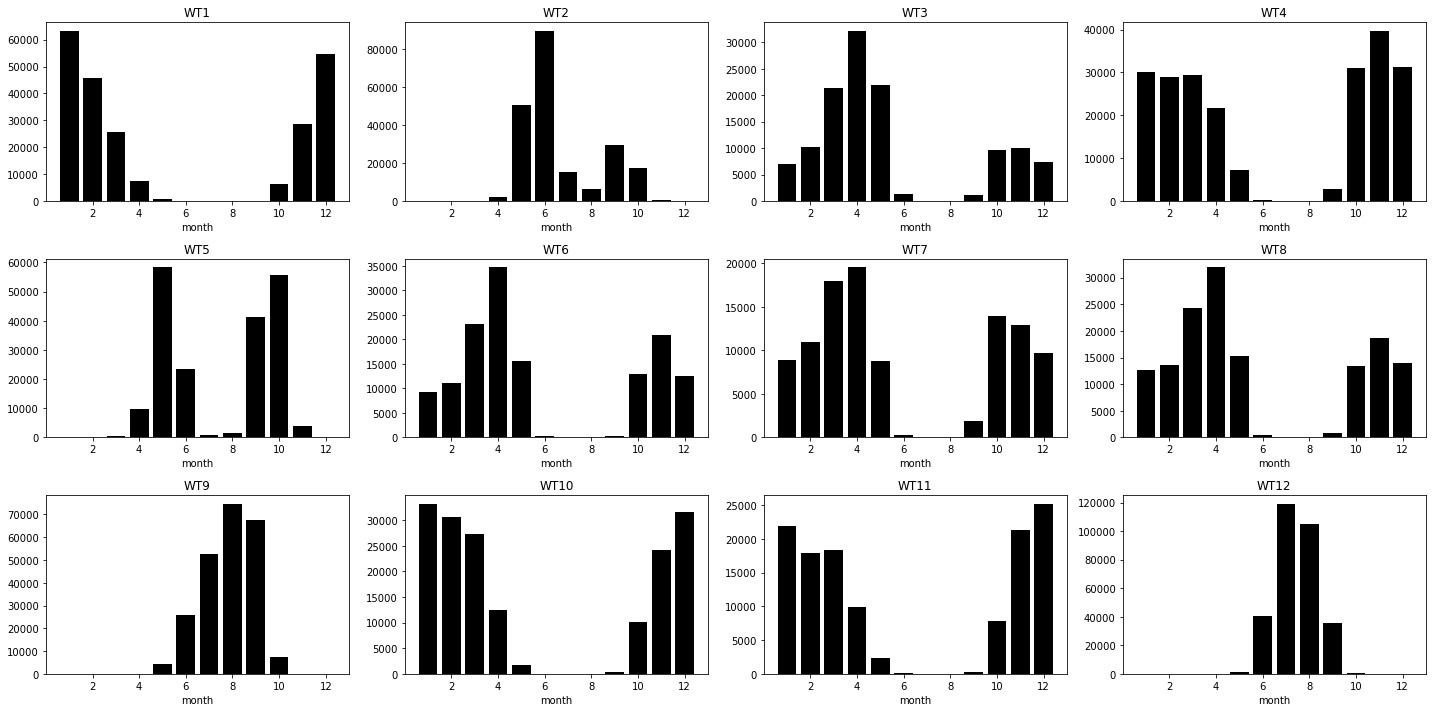

In [5]:
fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
        #axs[nr][nc].axis(ymin=0.5,ymax=80000) 
        #axs[nr][nc].xlim([0, 2000])
plt.tight_layout()          

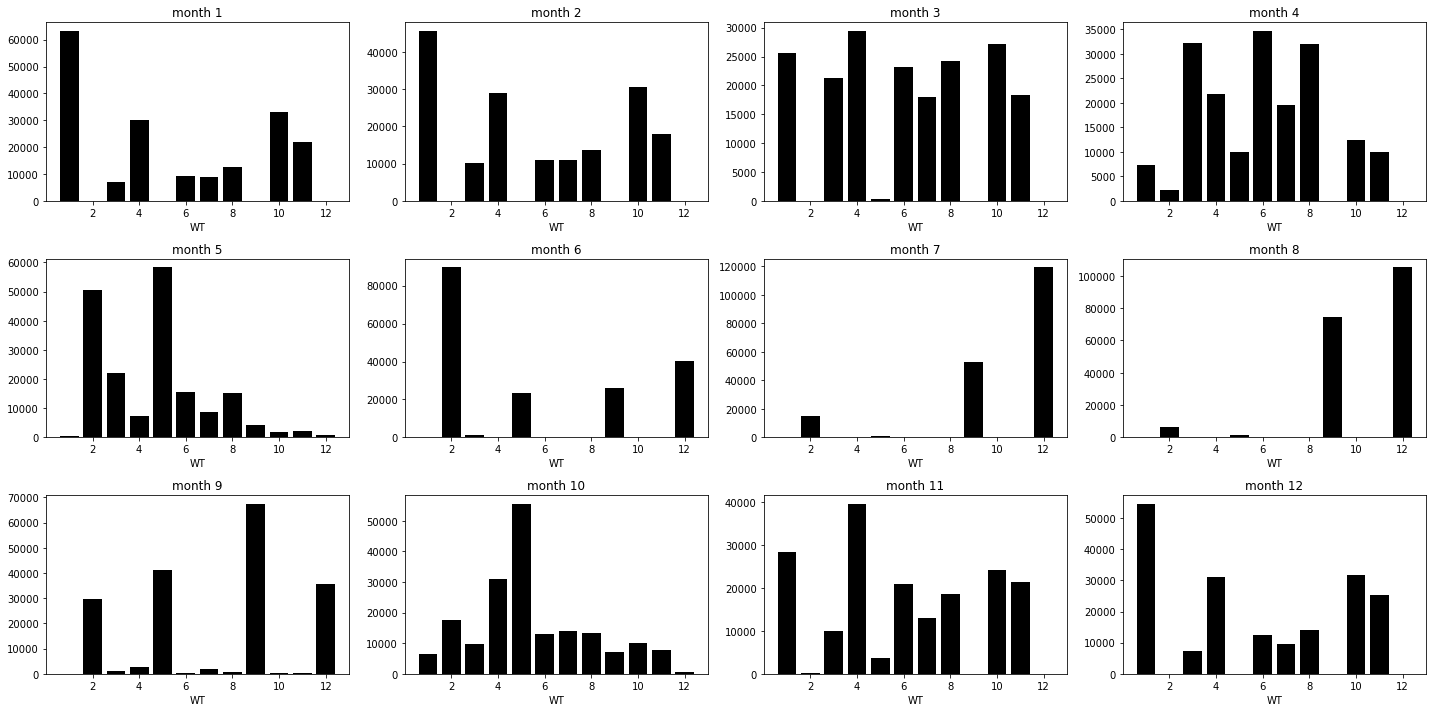

In [6]:
arr_swap_2d=arr_2d.swapaxes(0, 1)
fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        axs[nr][nc].set_xlabel("WT")
        axs[nr][nc].set_title("month " + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_swap_2d[nn], color ="black")
         
plt.tight_layout()      

#### Plotting 30-day forecast

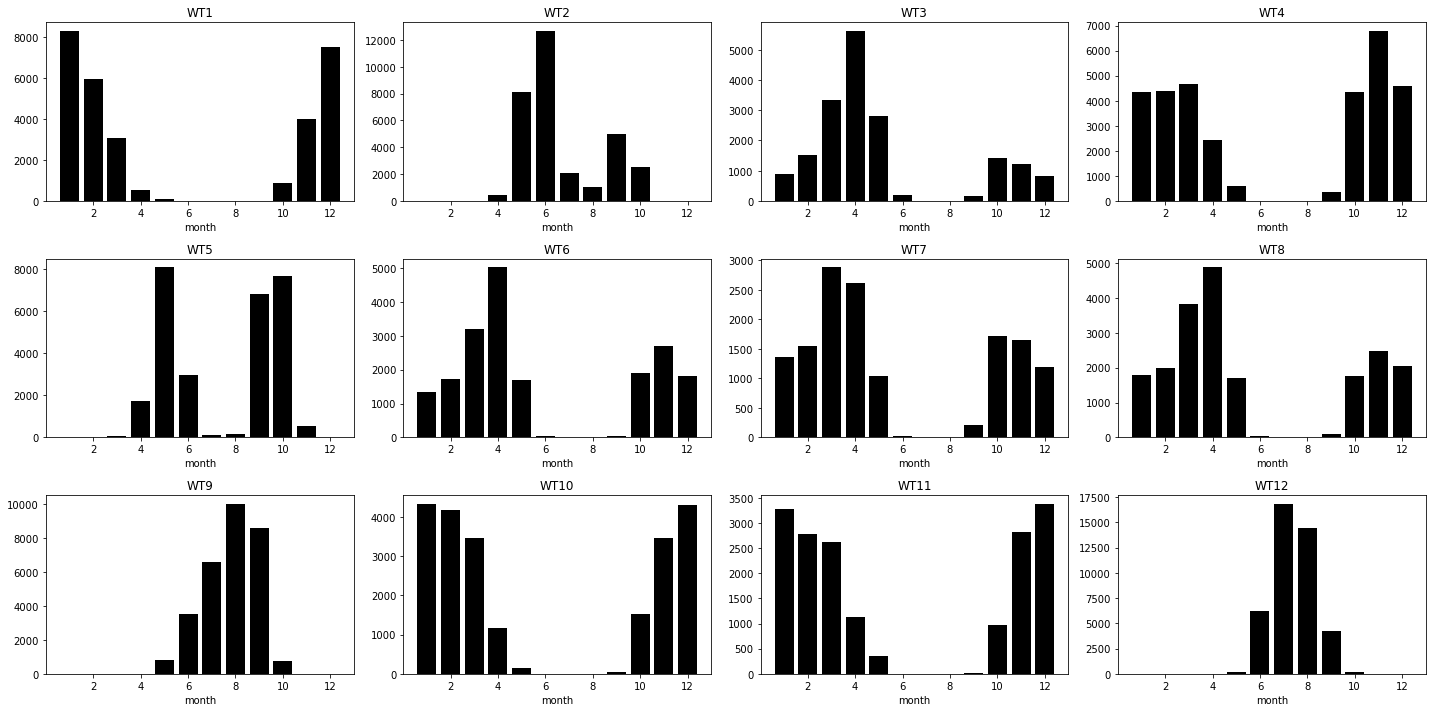

In [9]:
plot_wt_hist_day(dir_i, 30)

#### 90-day forecast

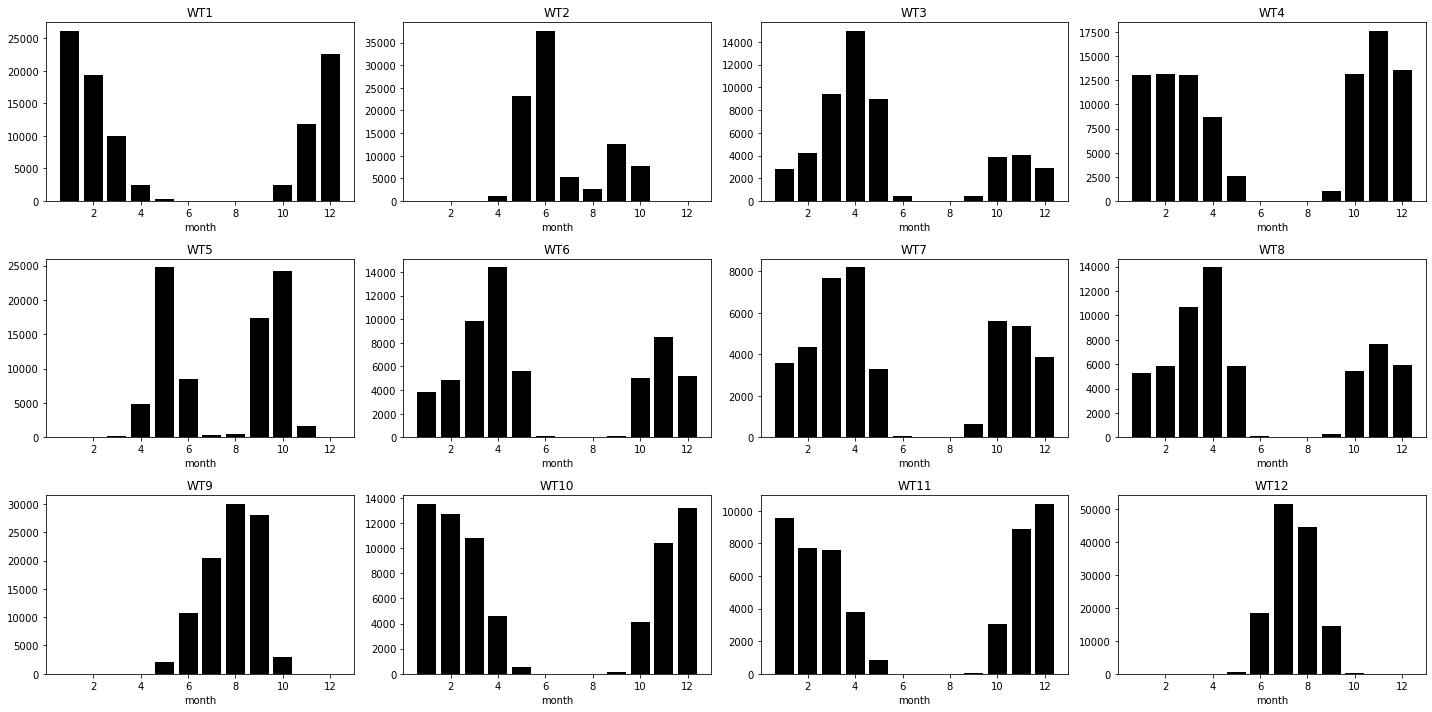

In [8]:
plot_wt_hist_day(dir_i, 90)

#### 120-day forecast

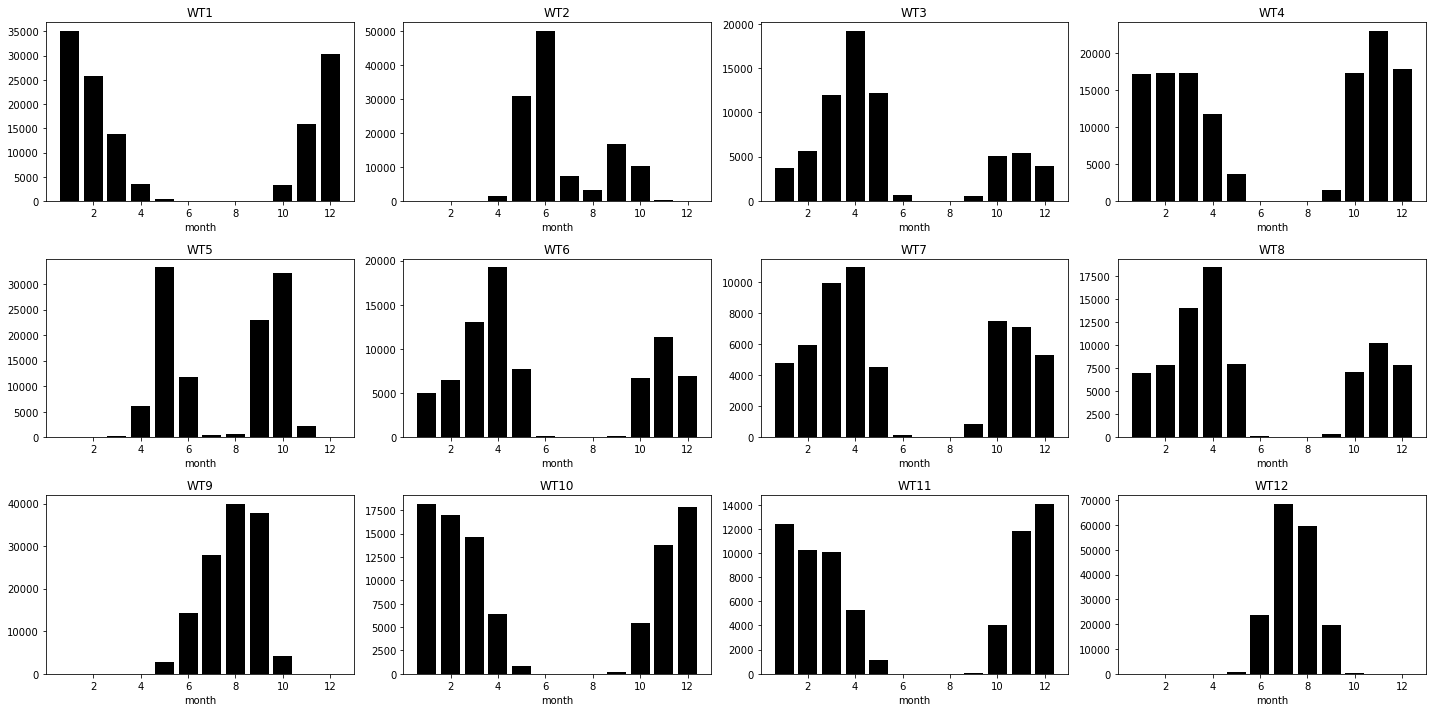

In [9]:
plot_wt_hist_day(dir_i, 120)

#### 150-day forecast

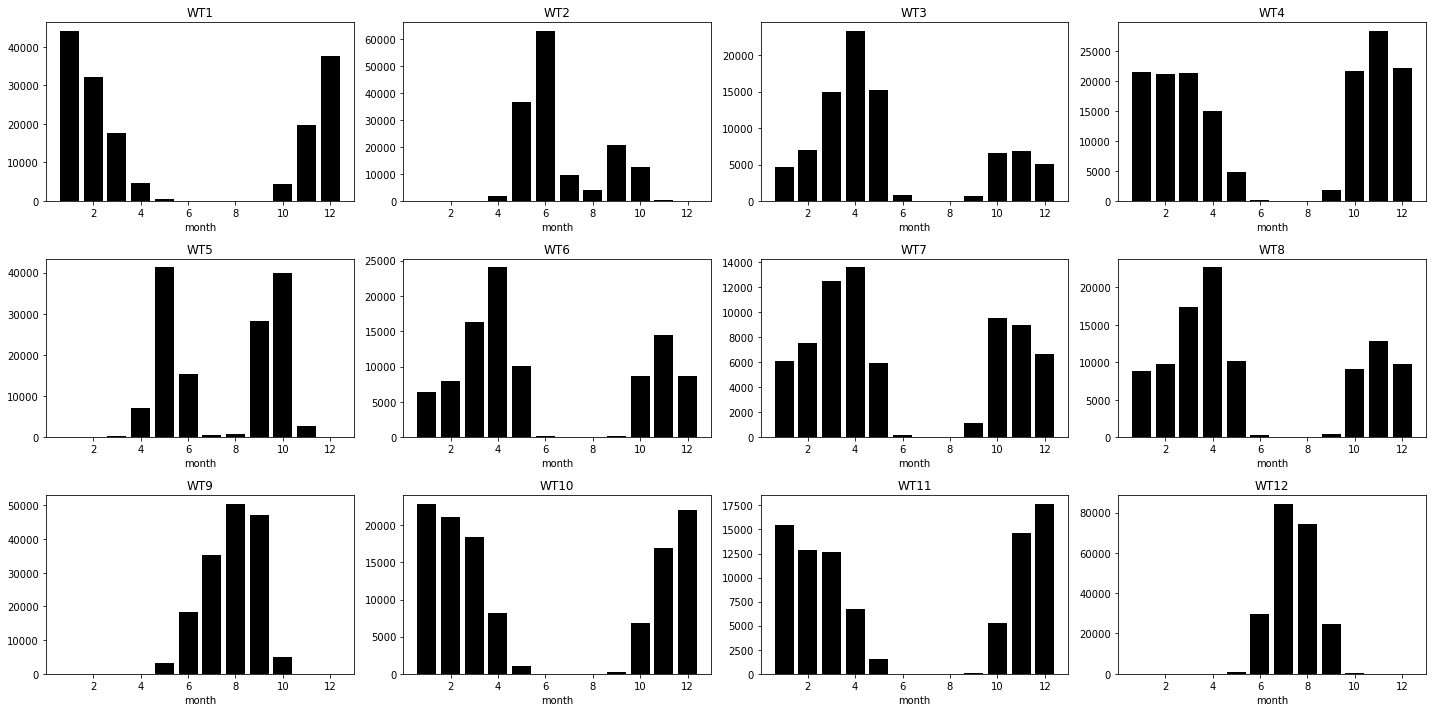

In [10]:
plot_wt_hist_day(dir_i, 150)

#### 215-day forecast

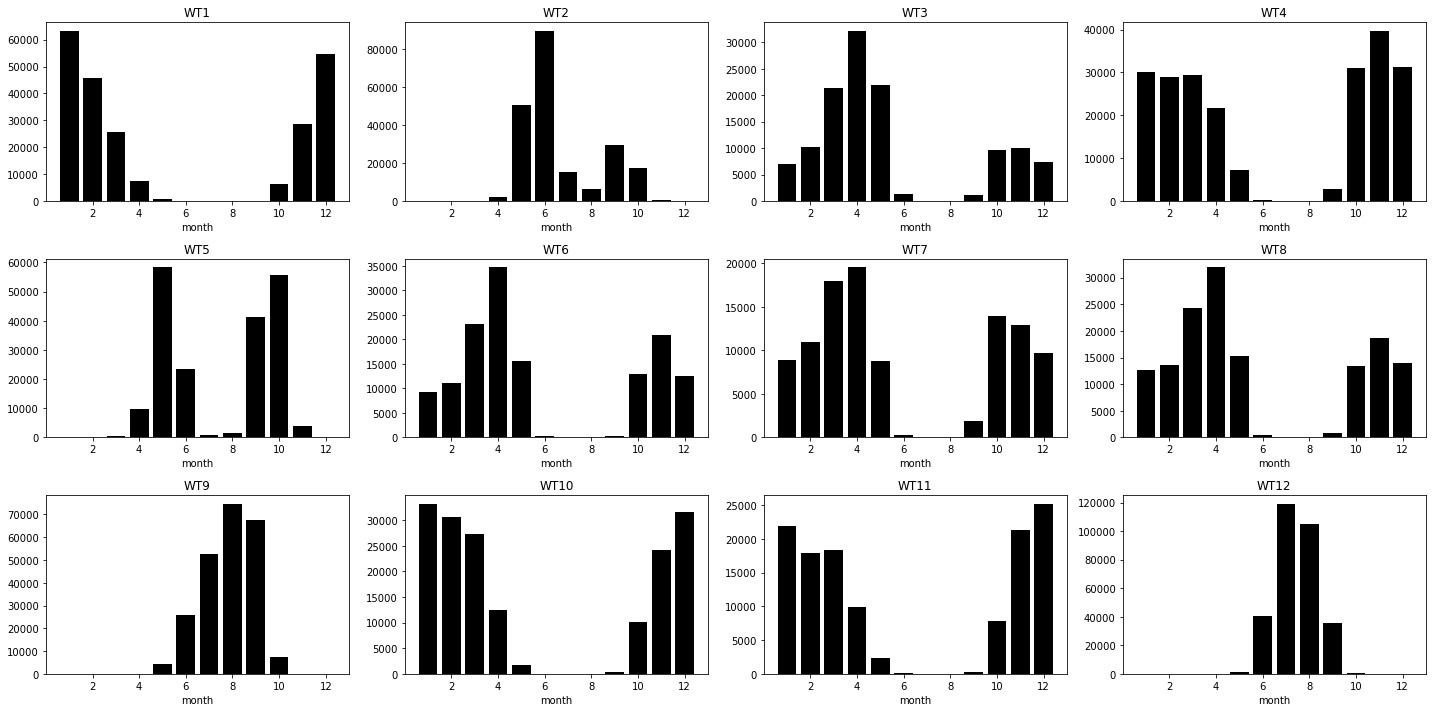

In [10]:
plot_wt_hist_day(dir_i, 215)

#### new ERA5 check

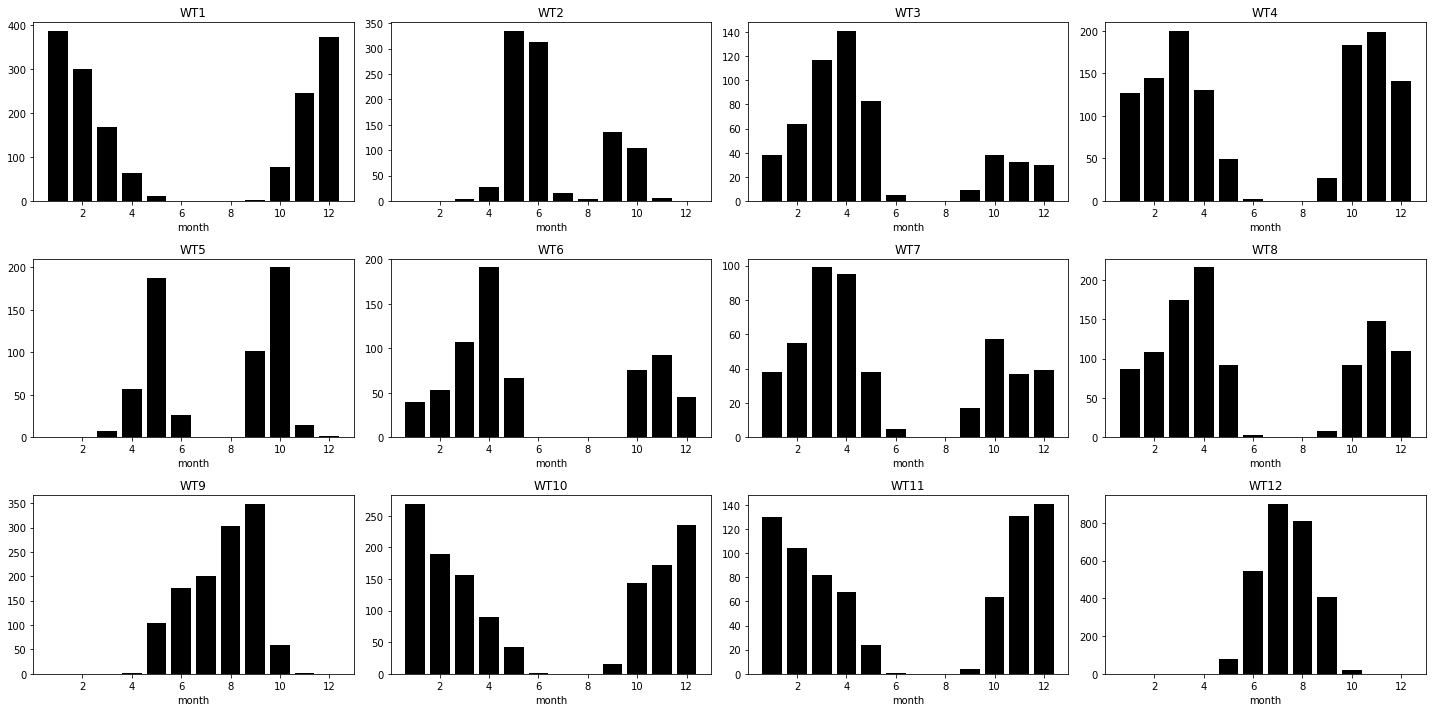

In [15]:
flnm_i = '/glade/campaign/mmm/c3we/mingge/COEXIST/ERA5/WT_1979-2014/CONUS-WTs_ERA5_1979-2014.cla'
n_wt = 12
n_month = 12
fwidths = [4,3,3,3,4]  
#wts = pd.read_fwf(flnm_i, widths = fwidths, header=None, names=["year", "month", "day", "hr", "wt"])
wts = pd.read_csv(flnm_i, delimiter = '\\t', header=None,  names=["year", "month", "day",  "wt"]) 
arr_2d = np.zeros((n_wt, n_month))
for nm in range(n_month):
        month_0 = nm + 1
         
        # Get the First Row of a Pandas DataFrame
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_2d[wt-1][nm]=arr_2d[wt-1][nm] + len(rows)
            
fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
        #axs[nr][nc].axis(ymin=0.5,ymax=80000) 
        #axs[nr][nc].xlim([0, 2000])
plt.tight_layout()

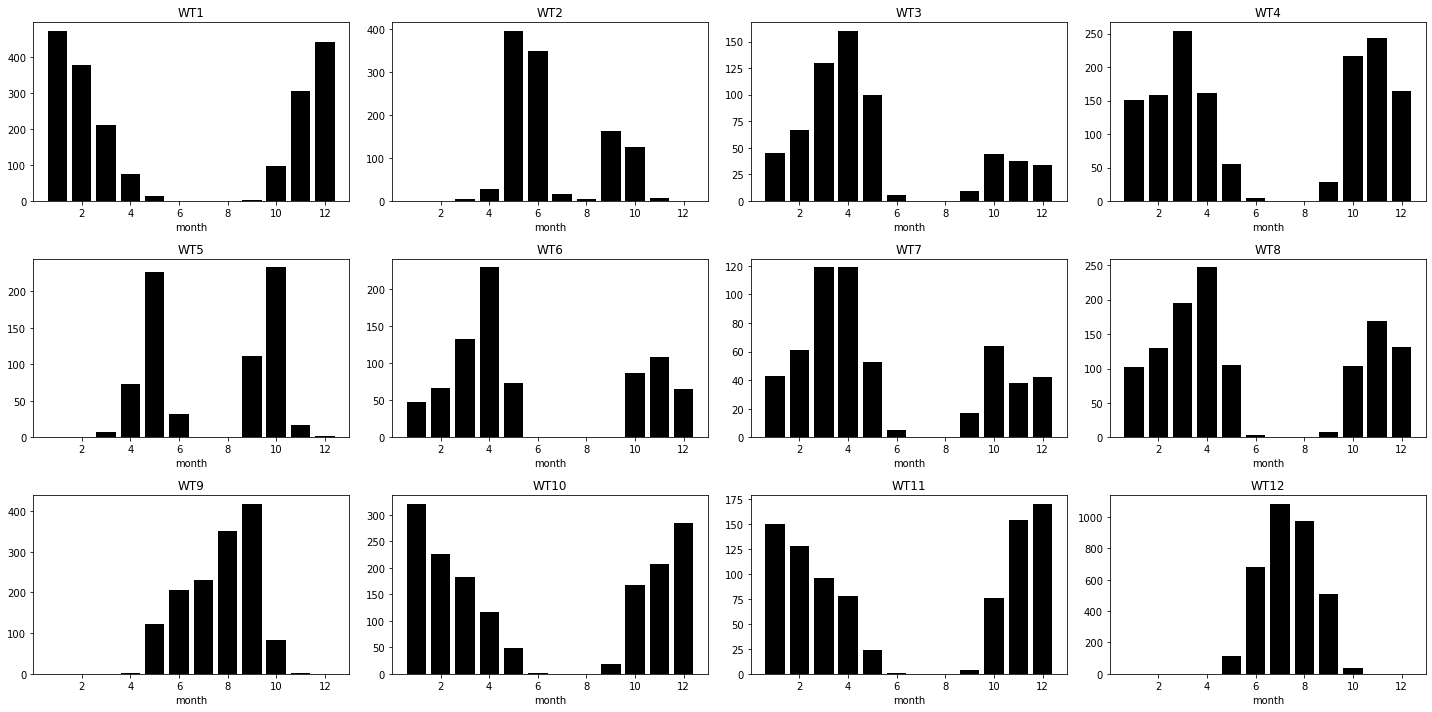

In [13]:
flnm_i = '/glade/campaign/mmm/c3we/mingge/COEXIST/ERA5/WT_1979-2021/CONUS-WTs_ERA5_1979-2021.cla'
n_wt = 12
n_month = 12
fwidths = [4,3,3,3,4]  
#wts = pd.read_fwf(flnm_i, widths = fwidths, header=None, names=["year", "month", "day", "hr", "wt"])
wts = pd.read_csv(flnm_i, delimiter = '\\t', header=None,  names=["year", "month", "day",  "wt"]) 
arr_2d = np.zeros((n_wt, n_month))
for nm in range(n_month):
        month_0 = nm + 1
         
        # Get the First Row of a Pandas DataFrame
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_2d[wt-1][nm]=arr_2d[wt-1][nm] + len(rows)
            
fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
        #axs[nr][nc].axis(ymin=0.5,ymax=80000) 
        #axs[nr][nc].xlim([0, 2000])
plt.tight_layout()

### STOP

array([3336., 3010., 2559.,  933., 1250., 1619., 1958., 2507., 4692.,
       5233., 4571., 3440.])

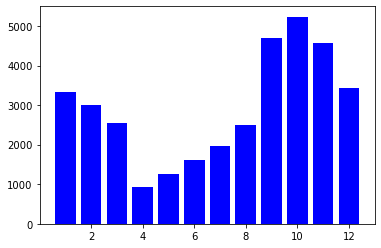

In [5]:
## member 25
plt.bar(range(1,13,1), arr_2d[6], color = "blue")
arr_2d[6]

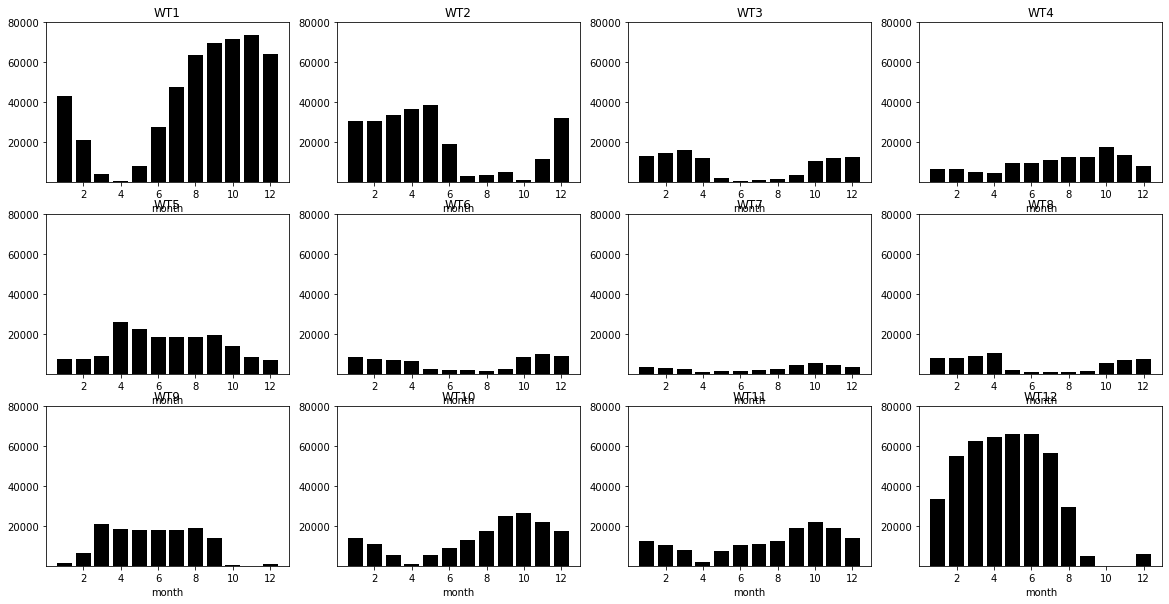

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
        axs[nr][nc].axis(ymin=0.5,ymax=80000) 
        #axs[nr][nc].xlim([0, 2000])
       

#### Member 01 normalize

In [55]:
dir_i = '/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/WT_NEW_01/'
arr_2d = np.zeros((n_wt, 12))
for year in range(year_s, year_e+1, 1):
    print(year)
    if year < 2017:
        n_mem = 25
    else:
        n_mem = 51
    
    for month in range(1,13,1):
        for mem in range(1, n_mem+1, 1):
            mem_s = str(mem).zfill(2)
            flnm_i = dir_i + 'CONUS-WTs_' + str(year) + str(month).zfill(2)+ '_'+ mem_s+'.cla'
            #print(flnm_i)
            wts = pd.read_csv(flnm_i, delimiter = '\t', header=None,  names=["year", "month", "day", "wt"])
            # Get Unique Values from a Column
            month_u=wts['month'].unique()
             
            for nm in range(0, n_month_fcst,1):
                month_0 = month_u[nm]
                rows_month=wts[(wts['month']==month_0)]
                # Get the First Row of a Pandas DataFrame
                
                for wt in range(1, n_wt+1,1):
                    rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
                    arr_2d[wt-1][month-1]=arr_2d[wt-1][month-1] + len(rows)


1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
